In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [2]:
# keys of twitter developer account
consumer_key = "094SGrKrtHeLH8SmtskHO9gGg"
consumer_secret = "vepA2TMLbMvjzGCBr49AY9y2Y2n9QxIApIhbb3gySKtqkYIy8q"
access_token = "1551925772633645056-VEh4J4Z47YMEb5BB6EaAHhTSBvn2ef"
access_token_secret = "zaA0ZULs4flerYOSI2aiIu24AoHCdcvEJmfeWb9jZZ6kN"

In [3]:
# creating authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set access token and access token secret 
auth.set_access_token(access_token, access_token_secret)

# create API object
api = tweepy.API(auth)

In [4]:
number_of_items = 1000
Id = []
TimeStamp = []
tweets = []
likes = []
Retweet_counts = []

In [5]:
for i in tweepy.Cursor(api.search_tweets, q="DroupadiMurmu",tweet_mode="extended",lang='en').items(number_of_items):
#   print(i)
    Id.append(i.user.id_str),
    tweets.append(i.full_text)
    TimeStamp.append(i.created_at),
    likes.append(i.favorite_count),
    Retweet_counts.append(i.retweet_count)

In [6]:
df = pd.DataFrame({'ID':Id,
                   'TimeStamp':TimeStamp,
                   'Tweets':tweets,
                   'Likes':likes,
                   'Retweet_count':Retweet_counts})
df

,ID,TimeStamp,Tweets,Likes,Retweet_count
0,1532183409380163584,2022-08-01 15:48:00+00:00,RT @ANI: #WATCH | President-elect #DroupadiMur...,0,376
1,1532183409380163584,2022-08-01 15:47:34+00:00,RT @ANI: President-elect #DroupadiMurmu pays t...,0,288
2,1248228211248345088,2022-08-01 15:45:59+00:00,RT @the_hindu: Former #Jharkhand Governor and ...,0,113
3,1532183409380163584,2022-08-01 15:44:18+00:00,RT @ANI: President-elect #DroupadiMurmu to tak...,0,296
4,1335271333412839424,2022-08-01 15:40:36+00:00,"Justice Shri N.V. Ramana, Chief Justice of Ind...",0,0
...,...,...,...,...,...
995,1326019847088611328,2022-07-29 16:06:45+00:00,RT @jankibaat1: ' Draupadi Murmu has scripted ...,0,27
996,1337759570194649089,2022-07-29 16:05:56+00:00,RT @airnewsalerts: A Parliamentary delegation ...,0,13
997,16387321,2022-07-29 16:05:04+00:00,#Congress MP #AdhirRanjanChowdhary TENDERS WRI...,2,0
998,1549940607010983937,2022-07-29 16:02:02+00:00,President #DroupadiMurmu writes to Sri Lankan ...,1,0


In [7]:
# Filtering Data

#Coverting this column in string because it was giving error
df['Tweets'] = df['Tweets'].astype(str)  

def filter_txt(text):
    text = re.sub(r'@[A-Za-z0-9]+:?', '', text)  # removing @mentions
    text = re.sub(r'RT[\s]+','',text) # removing RT
    text = re.sub(r'#','',text) # removing #
    text = re.sub(r'https?://(t|www).([a-zA-Z0-9/]+)','',text) # removing https links
    text = re.sub(r'[\n]+','',text) # removing \n
    text = re.sub(r'_','',text)
    text = re.sub(r'\s+',' ',text).strip() # trim if more then one whitespace
    text = text.lstrip()
    
    return text

In [8]:
# Applying the filter to the Tweets column
df['Tweets'] = df['Tweets'].apply(filter_txt)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df[["Tweets"]]

,Tweets
0,WATCH | President-elect DroupadiMurmu pays tri...
1,President-elect DroupadiMurmu pays tribute at ...
2,hindu: Former Jharkhand Governor and National ...
3,President-elect DroupadiMurmu to take oath as ...
4,"Justice Shri N.V. Ramana, Chief Justice of Ind..."
5,"Justice Shri N.V. Ramana, Chief Justice of Ind..."
6,"India: WeekNamaHighlights by MIB(31st July, 20..."
7,Minister of State for india and called on Pres...
8,The Chief Justice of India Justice NV Ramana a...
9,Congratulations and best wishes to Hon'ble ji 🙏🙏


In [9]:
# Creating analyzer from VADER to use its functions
analyzer = SentimentIntensityAnalyzer()

# Function to check what does polarity scores give - it gives 4 things - neg,neu,pos,compomd
def polarity(text):
    s = analyzer.polarity_scores(text)
    return (f"{text[:30]}...{str(s)}")

#applying the filter to tweets column
df['Tweets'].apply(polarity)

0      WATCH | President-elect Droupa...{'neg': 0.0, ...
1      President-elect DroupadiMurmu ...{'neg': 0.0, ...
2      hindu: Former Jharkhand Govern...{'neg': 0.0, ...
3      President-elect DroupadiMurmu ...{'neg': 0.0, ...
4      Justice Shri N.V. Ramana, Chie...{'neg': 0.0, ...
5      Justice Shri N.V. Ramana, Chie...{'neg': 0.0, ...
6      India: WeekNamaHighlights by M...{'neg': 0.0, ...
7      Minister of State for india an...{'neg': 0.0, ...
8      The Chief Justice of India Jus...{'neg': 0.0, ...
9      Congratulations and best wishe...{'neg': 0.0, ...
10     The BJP’s claim of empowering ...{'neg': 0.0, ...
11     President DroupadiMurmu and Pr...{'neg': 0.0, ...
12     Maldives 🇲🇻 President Ibrahim ...{'neg': 0.0, ...
13     President DroupadiMurmu and Pr...{'neg': 0.0, ...
14     In India, upper caste Hindu pr...{'neg': 0.0, ...
15     Dodwe: DroupadiMurmuShrimad Bh...{'neg': 0.0, ...
16     @MaheshDodwe: DroupadiMurmuShr...{'neg': 0.0, ...
17     in: Justice N.V. Ramana,

In [10]:
# Putting Tweets and their compound in a list
Tweets_polarity = []
for twts in df['Tweets']:
    ps = analyzer.polarity_scores(twts)
    Tweets_polarity.append({'Tweets':twts,
              'compound':ps['compound']})

In [11]:
# Converting the list into Dataframe
tweetdf = pd.DataFrame(Tweets_polarity)

In [12]:
# Function to classify the scores as pos,neg and neutral
def get_analysis(scores):
    if scores<0:
        return 'Negative'
    elif scores==0:
        return 'Neutral'
    else:
        return 'Positive'

# Adding column
tweetdf['Analysis'] = tweetdf['compound'].apply(get_analysis)

In [13]:
tweetdf

,Tweets,compound,Analysis
0,WATCH | President-elect DroupadiMurmu pays tri...,0.0000,Neutral
1,President-elect DroupadiMurmu pays tribute at ...,0.0000,Neutral
2,hindu: Former Jharkhand Governor and National ...,0.0000,Neutral
3,President-elect DroupadiMurmu to take oath as ...,0.0000,Neutral
4,"Justice Shri N.V. Ramana, Chief Justice of Ind...",0.7783,Positive
5,"Justice Shri N.V. Ramana, Chief Justice of Ind...",0.7783,Positive
6,"India: WeekNamaHighlights by MIB(31st July, 20...",0.0000,Neutral
7,Minister of State for india and called on Pres...,0.0000,Neutral
8,The Chief Justice of India Justice NV Ramana a...,0.7783,Positive
9,Congratulations and best wishes to Hon'ble ji 🙏🙏,0.8658,Positive


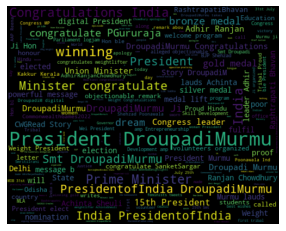

In [14]:
# size of word indicates its importance or frequrncy
allwords = " ".join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 500, height = 400, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

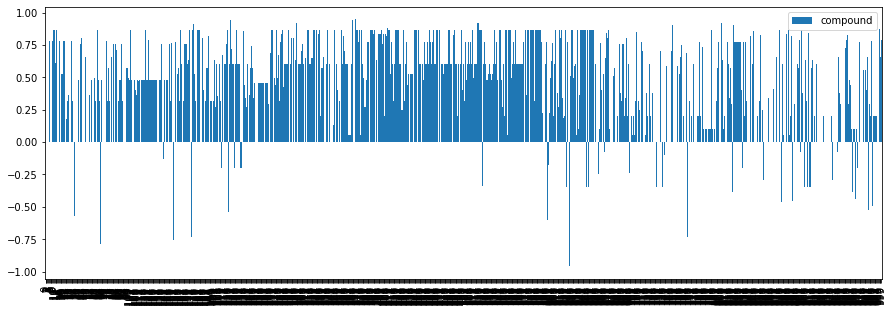

In [15]:
tweetdf.plot.bar(figsize=(15,5),width=1)

In [18]:
total_count = len(tweetdf['compound'])

In [19]:
# total percentage of positive tweets
positive_length = len(tweetdf[tweetdf.Analysis=="Positive"])
positive_percentage = (positive_length/total_count)*100
positive_percentage

68.89999999999999

In [20]:
# total percentage of negative tweets
negative_length = len(tweetdf[tweetdf.Analysis=="Negative"])
negative_percentage = (negative_length/total_count)*100
negative_percentage

5.3

In [21]:
# total percentage of neutral tweets
neutral_length = len(tweetdf[tweetdf.Analysis=="Neutral"])
neutral_percentage = (neutral_length/total_count)*100
neutral_percentage

25.8

In [23]:
#count of all the tweets
tweetdf['Analysis'].value_counts()

Positive    689
Neutral     258
Negative     53
Name: Analysis, dtype: int64